In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])

df.columns=['class_label','alcohol','malic_acid']

In [23]:
df.shape

(178, 3)

<Axes: xlabel='malic_acid', ylabel='Density'>

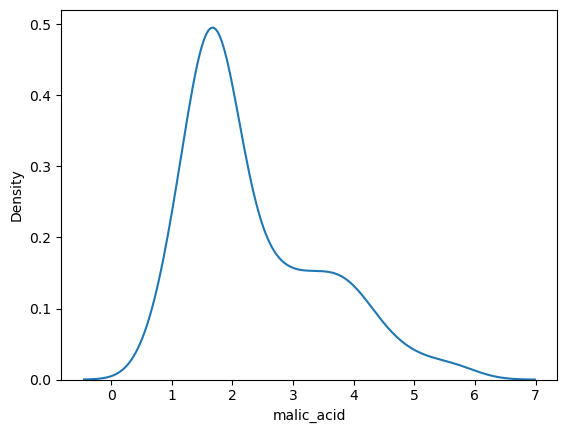

In [25]:
sns.kdeplot(df['malic_acid'])

In [20]:
df.head()

,class_label,alcohol,malic_acid
0,Wine,Alcohol,Malic.acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('class_label',axis=1),
                                                df['class_label'],
                                                test_size=0.3,
                                                random_state=0)

In [29]:
x_train.shape ,x_test.shape

((124, 2), (54, 2))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(x_train)

MinMaxScaler()

In [31]:
x_train_scalar = scalar.transform(x_train)
x_test_scalar = scalar.transform(x_test)

In [33]:
x_train_scaled = pd.DataFrame(x_train_scalar,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scalar,columns=x_test.columns)

In [36]:
np.round(x_train.describe())

,alcohol,malic_acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [38]:
np.round(x_train_scaled.describe())

,alcohol,malic_acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


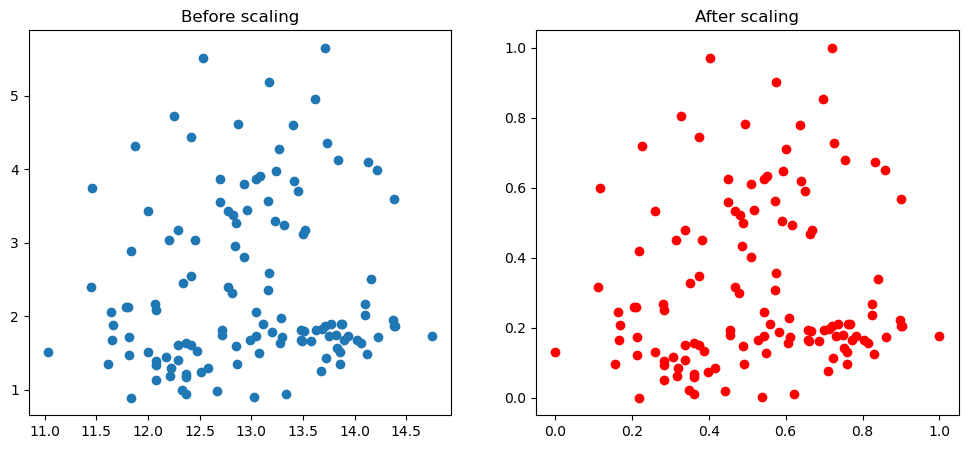

In [44]:
fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['alcohol'],x_train['malic_acid'])
ax1.set_title('Before scaling')

ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['malic_acid'],color='red')
ax2.set_title('After scaling')
plt.show()

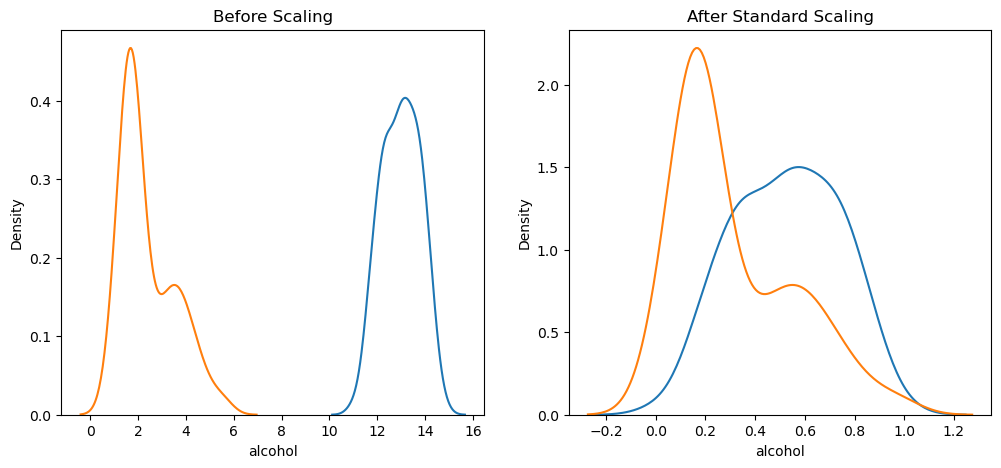

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['malic_acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['malic_acid'], ax=ax2)
plt.show()